# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [3]:
df = pd.read_csv('data/heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [5]:
df.shape

(920, 16)

# Exploratory Data Analysis

Text(0.5, 1.0, 'Heatmap for Null Values in Data')

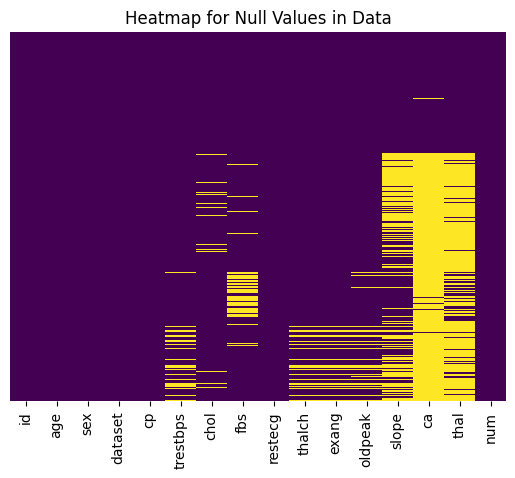

In [6]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Heatmap for Null Values in Data')

In [7]:
# check the percentage of missing values:
df.isnull().mean().sort_values(ascending=False) * 100

ca          66.413043
thal        52.826087
slope       33.586957
fbs          9.782609
oldpeak      6.739130
trestbps     6.413043
exang        5.978261
thalch       5.978261
chol         3.260870
restecg      0.217391
cp           0.000000
dataset      0.000000
id           0.000000
age          0.000000
sex          0.000000
num          0.000000
dtype: float64

In [8]:
sns.set_style('darkgrid')

<Axes: xlabel='age', ylabel='Count'>

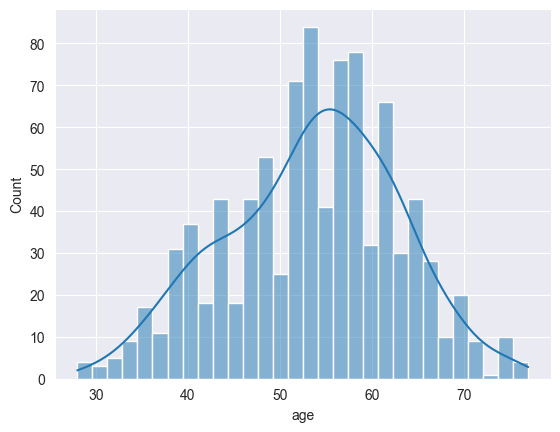

In [9]:
sns.histplot(df['age'], bins=30, kde=True)

In [10]:
print(df['id'].min(), df['id'].max())

1 920


In [11]:
print(df['age'].min(), df['age'].max())

28 77


In [12]:
df.groupby('restecg')['num'].count()

restecg
lv hypertrophy      188
normal              551
st-t abnormality    179
Name: num, dtype: int64

In [13]:
df.groupby('sex')['num'].count()

sex
Female    194
Male      726
Name: num, dtype: int64

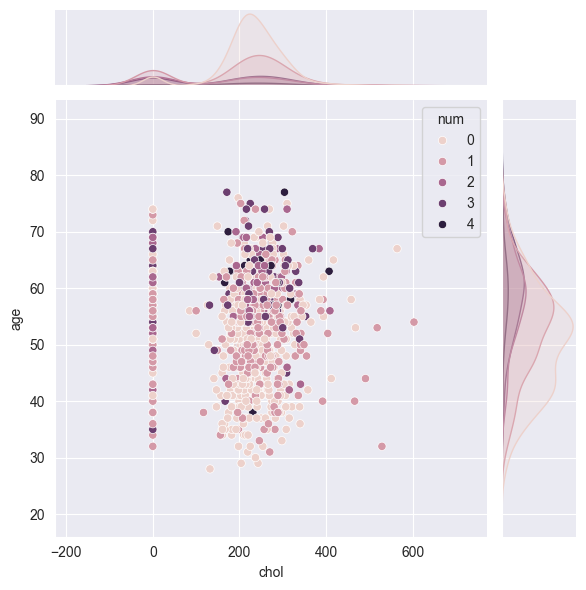

In [14]:
sns.jointplot(x='chol', y='age', data=df, hue='num')

# Dealing with Missing Values using Imputation Methods

In [15]:
from sklearn.impute import SimpleImputer

# Mean for numerical
num_imputer = SimpleImputer(strategy='mean')
df[['oldpeak', 'thalch', 'trestbps', 'chol']] = num_imputer.fit_transform(df[['oldpeak', 'thalch', 'trestbps', 'chol']])

# Mode for categorical
cat_imputer = SimpleImputer(strategy='most_frequent')
df[['restecg','slope', 'ca', 'thal']] = cat_imputer.fit_transform(df[['restecg','slope', 'ca', 'thal']])

bool_imputer = SimpleImputer(strategy='most_frequent')
df[['fbs','exang']] = bool_imputer.fit_transform(df[['fbs','exang']])

Text(0.5, 1.0, 'Heatmap for Null Values in Data')

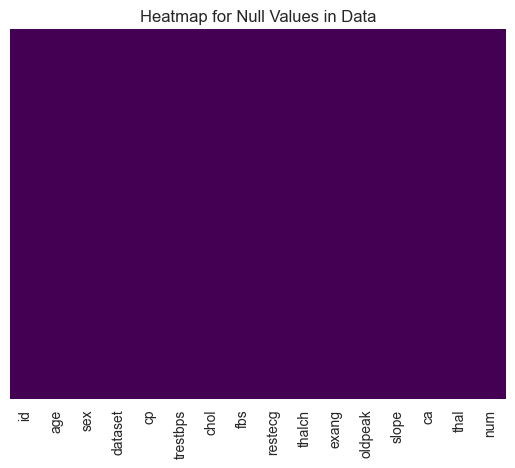

In [16]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Heatmap for Null Values in Data')

In [17]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


### Using Encoding Technique To Provide Labels to Categorical Data

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
lbl = LabelEncoder()

In [20]:
for col in ['restecg', 'slope', 'ca', 'thal', 'sex', 'exang', 'fbs', 'dataset', 'cp']:
    df[col] = lbl.fit_transform(df[col])

In [21]:
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

## Train-Test Data Split

In [22]:
X = df.drop('num', axis=1)
y = df['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knn = KNeighborsClassifier(n_neighbors=1)

In [25]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [26]:
pred = knn.predict(X_test)

In [27]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73       117
           1       0.81      0.76      0.79       159

    accuracy                           0.76       276
   macro avg       0.76      0.76      0.76       276
weighted avg       0.76      0.76      0.76       276



**Using ELBOW Method to find the K value**

In [28]:
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'error rate')

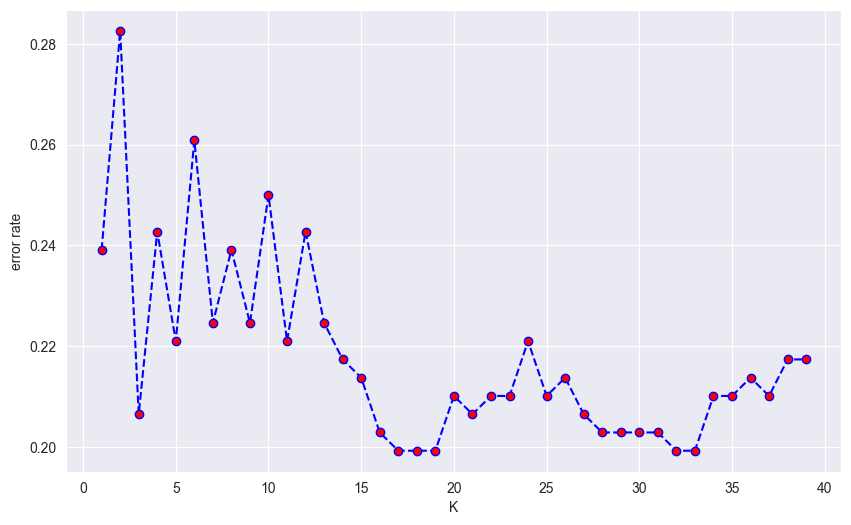

In [29]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='--', marker='o', markerfacecolor='red')
plt.xlabel('K')
plt.ylabel('error rate')

In [30]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       117
           1       0.82      0.81      0.81       159

    accuracy                           0.79       276
   macro avg       0.78      0.78      0.78       276
weighted avg       0.79      0.79      0.79       276



Text(50.722222222222214, 0.5, 'Actual')

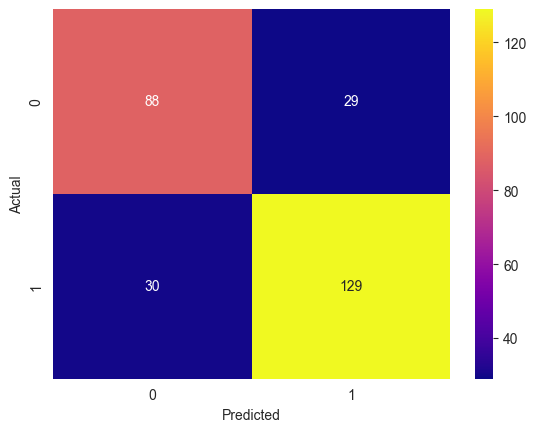

In [53]:
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, fmt='d', cmap='plasma')
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Logistics Regression

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
lrmodel = LogisticRegression()

In [33]:
lrmodel.fit(X_train, y_train)

C:\Users\gpiska\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
lr_pred = lrmodel.predict(X_test)

In [35]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.75      0.76      0.75       117
           1       0.82      0.81      0.82       159

    accuracy                           0.79       276
   macro avg       0.78      0.79      0.79       276
weighted avg       0.79      0.79      0.79       276



Text(50.722222222222214, 0.5, 'Actual')

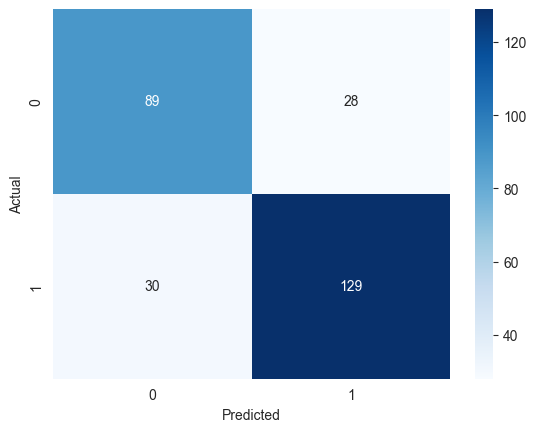

In [54]:
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
dtree = DecisionTreeClassifier()

In [38]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [39]:
dtree_pred = dtree.predict(X_test)

In [40]:
print(classification_report(y_test,dtree_pred))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76       117
           1       0.84      0.78      0.81       159

    accuracy                           0.79       276
   macro avg       0.79      0.79      0.79       276
weighted avg       0.79      0.79      0.79       276



Text(50.722222222222214, 0.5, 'Actual')

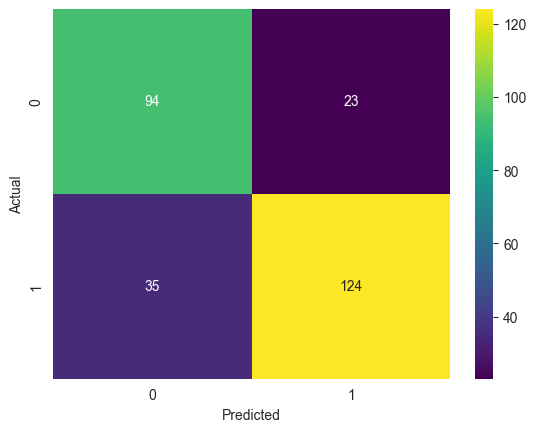

In [55]:
sns.heatmap(confusion_matrix(y_test, dtree_pred), annot=True, fmt='d', cmap='viridis')
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rfc = RandomForestClassifier(n_estimators=600)

In [43]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [44]:
rfc_pred =  rfc.predict(X_test)

In [45]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       117
           1       0.91      0.87      0.89       159

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.87       276
weighted avg       0.88      0.88      0.88       276



Text(50.722222222222214, 0.5, 'Actual')

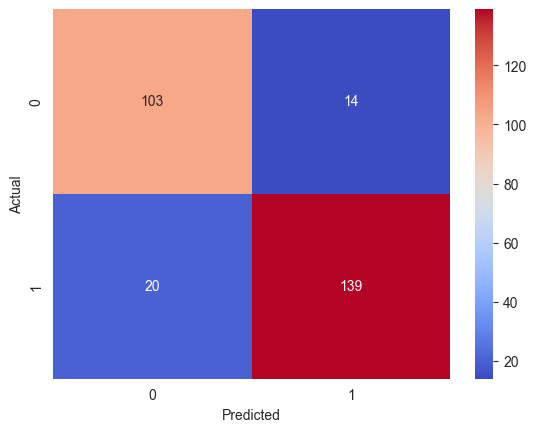

In [56]:
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, fmt='d', cmap='coolwarm')
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
model = LinearRegression()

In [48]:
model.fit(X_train, y_train)

LinearRegression()

In [49]:
ln_pred = model.predict(X_test)

In [50]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_test, ln_pred)
print(f"R-squared: {r2:.2f}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, ln_pred)
print(f"Mean Absolute Error: {mae:.2f}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, ln_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.2f}")

R-squared: 0.38
Mean Absolute Error: 0.32
Mean Squared Error: 0.15
Root Mean Squared Error: 0.39


# Comparing All Models Accuracy

In [51]:
# Accuracy
knn_acc = accuracy_score(y_test, knn_pred)
logreg_acc = accuracy_score(y_test, lr_pred)
rf_acc = accuracy_score(y_test, rfc_pred)
dtree_acc = accuracy_score(y_test, dtree_pred)

C:\Users\gpiska\AppData\Local\Temp\ipykernel_22280\1995555273.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Model', y='Accuracy', data=acc_df, palette='viridis')


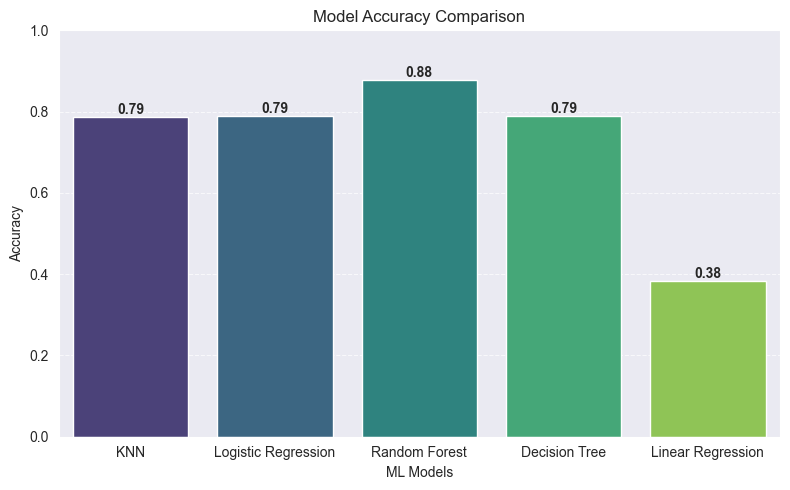

In [52]:
# Dictionary of model names and accuracies
accuracy_scores = {
    'KNN': knn_acc,
    'Logistic Regression': logreg_acc,
    'Random Forest': rf_acc,
    'Decision Tree': dtree_acc,
    'Linear Regression': r2
}

acc_df = pd.DataFrame({
    'Model': list(accuracy_scores.keys()),
    'Accuracy': list(accuracy_scores.values())
})

# Plot using seaborn
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Model', y='Accuracy', data=acc_df, palette='viridis')

# Add data labels on top of bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", 
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Styling
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.xlabel('ML Models')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()